In [62]:
# Impor Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Menggunakan pandas untuk membaca dataset
data = pd.read_csv('dataset/Ice Cream.csv')

# Menampilkan 5 data pertama
print(data.head())

   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


## Preprocessing Data

In [64]:
# cek missing values
data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [66]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


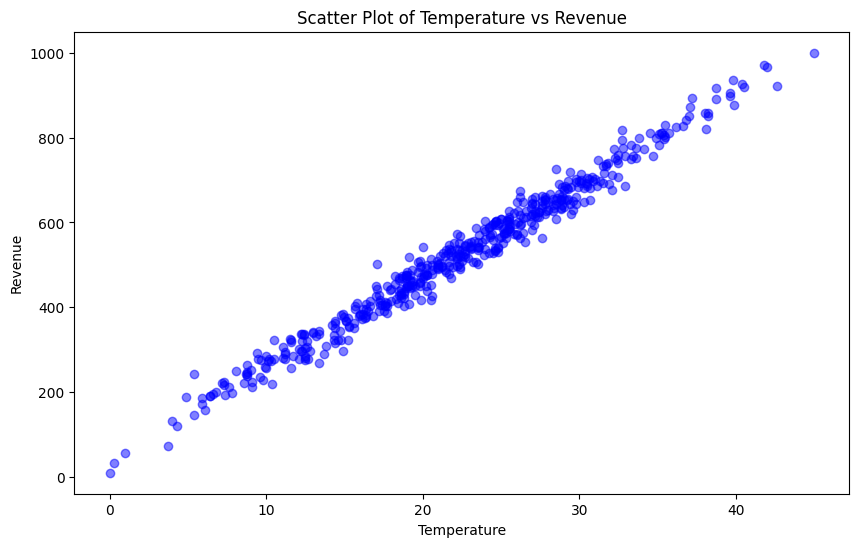

In [67]:
# Membuat plot scatter untuk melihat hubungan antara Temperature dan Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Revenue'], color='blue', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Temperature vs Revenue')
plt.show()

In [68]:
# Memisahkan fitur dan target
X = data[['Temperature']].values  # Mengubah ke dalam bentuk array
y = data['Revenue'].values

In [69]:
# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Melatih Model Simple Linear Regression

In [70]:
# Membuat model regresi linear
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Memprediksi data test
y_pred = model.predict(X_test)

## Evaluasi Model

In [71]:
# Menghitung nilai intercept dan koefisien
intercept = model.intercept_
coefficient = model.coef_[0]

# Menghitung Mean Squared Error dan R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Intercept: {intercept}')
print(f'Coefficient: {coefficient}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Intercept: 46.17834580774047
Coefficient: 21.384000731002768
Mean Squared Error: 652.4938284912412
R2 Score: 0.9771509516333023


# Melakukan Eksperimen dengan Variasi Berbeda

In [72]:
test_sizes = [0.2, 0.3, 0.5]
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    intercept = model.intercept_
    coefficient = model.coef_[0]
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'test_size': test_size,
        'intercept': intercept,
        'coefficient': coefficient,
        'MSE': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)
print(results_df)

   test_size  intercept  coefficient         MSE        R2
0        0.2  46.699005    21.341567  607.091158  0.981442
1        0.3  47.565404    21.338679  609.779128  0.981799
2        0.5  44.597832    21.427087  657.394893  0.978815


## Membandingkan Hasil Prediksi dengan True Label dalam Bentuk DataFrame

In [73]:
# Membuat DataFrame untuk membandingkan hasil prediksi dengan true label
comparison_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

print(comparison_df.head())

   True Label  Predicted Label
0         715       689.553149
1         580       593.131257
2         652       702.409401
3         285       295.294749
4         433       443.141649


## Visualisasi Hasil dengan Plot Scatter dan Garis Regresi

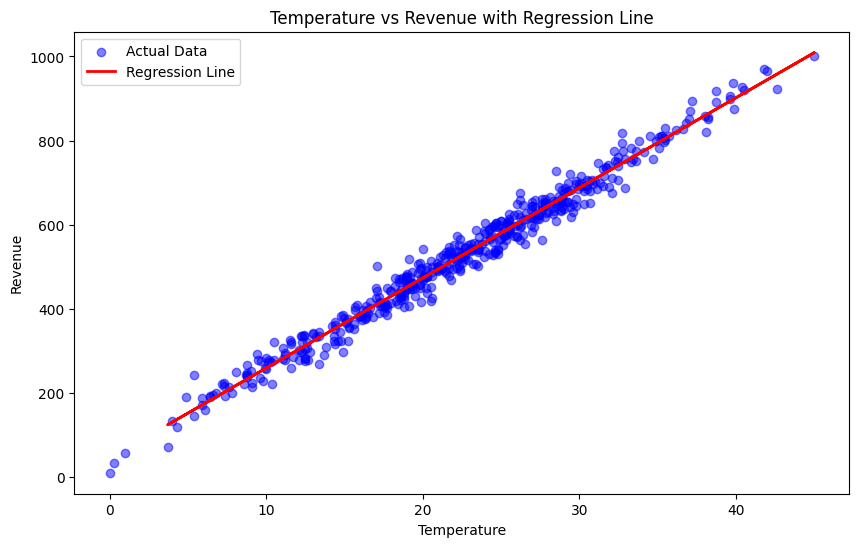

In [74]:
# Membuat plot scatter untuk data asli
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Revenue'], color='blue', alpha=0.5, label='Actual Data')

# Membuat garis regresi berdasarkan prediksi model
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Menambahkan label dan judul
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature vs Revenue with Regression Line')
plt.legend()

# Menampilkan plot
plt.show()
